In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("asu_solar_dataset.csv")
df.head()

,DCArrayOutput_W_,Vmp,Imp,CellTemperature_C_,PlaneOfArrayIrradiance_W_m_2_,Fill Factor,Gamma,Pmp,Voc,Isc,Degraded,Shaded,Soiled,SC,STC
0,4715.409,36.331723,1.369981,16.107,281.111,4.669695,0.177061,49.773762,44.338856,5.242090,0,0,0,0,1
1,9076.926,37.436438,2.559325,26.713,527.216,2.391698,0.181732,95.811997,44.023777,5.205219,0,0,0,0,1
2,11978.364,35.924148,3.519590,36.542,712.905,1.913899,0.177356,126.438287,45.239121,5.349134,0,0,0,0,1
3,13606.691,35.296861,4.069092,40.619,820.486,1.637532,0.175050,143.626183,44.804407,5.249316,0,0,0,0,1
4,13953.936,34.555717,4.262436,45.436,861.077,1.629109,0.171055,147.291547,44.492927,5.393082,0,0,0,0,1


In [ ]:
df.shape

(21485, 15)

In [ ]:
df.describe()

,DCArrayOutput_W_,Vmp,Imp,CellTemperature_C_,PlaneOfArrayIrradiance_W_m_2_,Fill Factor,Gamma,Pmp,Voc,Isc,Degraded,Shaded,Soiled,SC,STC
count,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000,21485.000000
mean,7265.217536,34.709730,2.266223,41.857445,525.395917,12.478621,0.148594,76.688407,41.351488,4.863000,0.200000,0.200000,0.200000,0.200000,0.200000
std,4367.778044,1.881281,1.418129,15.590236,321.642387,49.638813,0.020984,46.104324,5.737365,0.700934,0.400009,0.400009,0.400009,0.400009,0.400009
min,12.652000,29.581269,0.003567,-2.431000,0.708750,0.629365,0.090242,0.133549,26.977170,2.890480,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3303.316000,33.173285,0.969855,30.539000,240.620000,1.794753,0.131056,34.868336,42.896884,4.889866,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7801.328000,34.829434,2.360387,43.320000,530.798000,2.558241,0.148639,82.347351,43.928602,5.137490,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10881.283000,36.345109,3.452011,54.421000,790.857000,5.978401,0.163742,114.857987,44.605180,5.298280,0.000000,0.000000,0.000000,0.000000,0.000000
max,18000.447000,37.699846,5.531804,77.767000,1122.657000,1790.486473,0.214525,190.004718,47.319207,5.992872,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2 = df.drop("Degraded", axis='columns')
df3 = df2.drop("Shaded", axis='columns')
df4 = df3.drop("Soiled", axis='columns')
df5 = df4.drop("SC", axis='columns')

X = df5.drop("STC", axis='columns')
y = df5.STC

X.head()

,DCArrayOutput_W_,Vmp,Imp,CellTemperature_C_,PlaneOfArrayIrradiance_W_m_2_,Fill Factor,Gamma,Pmp,Voc,Isc
0,4715.409,36.331723,1.369981,16.107,281.111,4.669695,0.177061,49.773762,44.338856,5.242090
1,9076.926,37.436438,2.559325,26.713,527.216,2.391698,0.181732,95.811997,44.023777,5.205219
2,11978.364,35.924148,3.519590,36.542,712.905,1.913899,0.177356,126.438287,45.239121,5.349134
3,13606.691,35.296861,4.069092,40.619,820.486,1.637532,0.175050,143.626183,44.804407,5.249316
4,13953.936,34.555717,4.262436,45.436,861.077,1.629109,0.171055,147.291547,44.492927,5.393082


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.58379063,  0.86219458, -0.63200437, ..., -0.58379063,
         0.52069856,  0.54084798],
       [ 0.41479915,  1.44942224,  0.20668649, ...,  0.41479915,
         0.46578021,  0.4882435 ],
       [ 1.07909699,  0.64554193,  0.88383816, ...,  1.07909699,
         0.67761485,  0.69356702],
       ...,
       [ 0.27590035, -0.20961857,  0.23923916, ...,  0.27590035,
         0.53480751,  0.55034093],
       [-0.25114121,  0.00490763, -0.27563719, ..., -0.25114121,
         0.563227  ,  0.4535354 ],
       [-0.91949819,  0.9200177 , -0.93439233, ..., -0.91949819,
         0.81773138,  0.55277542]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =2)
X_train.shape

(17188, 10)

In [ ]:
X_test.shape

(4297, 10)

In [ ]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.7938096346288108

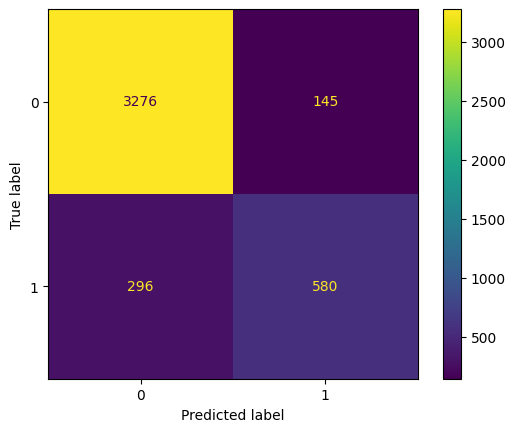

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()